##### **Importing Libraries:**

In [4]:
import requests
from bs4 import BeautifulSoup
import csv, json
from urllib.parse import urljoin
import pandas as pd
import re 
import matplotlib.pyplot as plt
import seaborn as sns

##### **Data Extraction:**

In [6]:
base_url = 'https://books.toscrape.com'
page_url = 'https://books.toscrape.com/catalogue/page-{}.html'

In [7]:
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

booksData = []

for page in range(1, 51):
    
    print(f'Scraping page-{page}...')
    
    if page == 1:
        url = base_url
    else:
        url = page_url.format(page)
        

    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')

    for book in soup.select('article.product_pod'):
        title = book.h3.a['title']
        price = book.select_one('.price_color').text
        availability = book.select_one('.availability').text.strip()

        rating_class = book.select_one('p.star-rating')['class']
        star_word = [cls for cls in rating_class if cls != 'star-rating'][0]
        stars = rating_map.get(star_word, 0)

        relative_link = book.h3.a['href']
        if 'catalogue/' not in relative_link:
            relative_link = 'catalogue/' + relative_link
        book_url = urljoin(base_url, relative_link)

        detail_res = requests.get(book_url)
        detail_soup = BeautifulSoup(detail_res.text, 'html.parser')

        desc_tag = detail_soup.select_one('#product_description ~ p')
        description = desc_tag.text.strip() if desc_tag else None

        table = detail_soup.select_one('table.table.table-striped')
        info = {row.th.text: row.td.text for row in table.select('tr')} if table else None
        upc = info.get('UPC', '') if info else None


        genre_tags = detail_soup.select('ul.breadcrumb li > a')
        
        genre_tag = genre_tags[2].text.strip() if len(genre_tags) > 2 else None


        booksData.append({
            'title': title,
            'price': price,
            'availability': availability,
            'stars': stars,
            'url': book_url,
            'description': description,
            'upc': upc,
            'genre': genre_tag,
        })

Scraping page-1...


KeyboardInterrupt: 

##### **Saving data:**

In [ ]:
with open('books.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=booksData[0].keys())
    writer.writeheader()
    writer.writerows(booksData)

In [ ]:
with open('books.json', 'w', encoding='utf-8') as f:
    json.dump(booksData, f, indent=4, ensure_ascii=False)

##### **Data Cleaning & Processing:**

In [6]:
df = pd.read_csv('books.csv')

df.sample(10)

,title,price,availability,stars,url,description,upc,genre
919,The Selfish Gene,Â£29.45,In stock,1,https://books.toscrape.com/catalogue/the-selfi...,Richard Dawkins' brilliant reformulation of th...,6f2c0a9adbb2bca9,Science
62,The Most Perfect Thing: Inside (and Outside) a...,Â£42.96,In stock,4,https://books.toscrape.com/catalogue/the-most-...,Renowned ornithologist Tim Birkhead opens this...,aadee1c326d286e3,Science
307,Every Last Word,Â£46.47,In stock,3,https://books.toscrape.com/catalogue/every-las...,"If you could read my mind, you wouldn't be smi...",a2bd4ca82d908442,Default
530,How to Be a Domestic Goddess: Baking and the A...,Â£28.25,In stock,2,https://books.toscrape.com/catalogue/how-to-be...,Nigella Lawson's How to Be a Domestic Goddess ...,eff5710404e2ff78,Food and Drink
210,Anonymous,Â£46.82,In stock,4,https://books.toscrape.com/catalogue/anonymous...,"Logan Matthews is a father, architect, and wid...",d24b829be2ca81c4,Default
110,Don't Be a Jerk: And Other Practical Advice fr...,Â£37.97,In stock,2,https://books.toscrape.com/catalogue/dont-be-a...,A Radical but Reverent Paraphrasing of Dogenâ...,fce19f9b4a943f22,Religion
617,Last One Home (New Beginnings #1),Â£59.98,In stock,3,https://books.toscrape.com/catalogue/last-one-...,"Growing up, Cassie Carter and her sisters, Kar...",07e6810fd3236bda,Fiction
650,The Jazz of Physics: The Secret Link Between M...,Â£38.71,In stock,3,https://books.toscrape.com/catalogue/the-jazz-...,"More than fifty years ago, John Coltrane drew ...",6a57286a8890d8c5,Nonfiction
809,Lust & Wonder,Â£11.87,In stock,2,https://books.toscrape.com/catalogue/lust-wond...,First came Running with Scissors. Then came Dr...,0dcadb06206abd3c,Autobiography
826,If I Run (If I Run #1),Â£49.97,In stock,4,https://books.toscrape.com/catalogue/if-i-run-...,Casey knows the truth.But it wonât set her f...,61569d12d4ae7161,Christian Fiction


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1000 non-null   object
 1   price         1000 non-null   object
 2   availability  1000 non-null   object
 3   stars         1000 non-null   int64 
 4   url           1000 non-null   object
 5   description   998 non-null    object
 6   upc           1000 non-null   object
 7   genre         1000 non-null   object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [8]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         998 non-null    object
 1   price         998 non-null    object
 2   availability  998 non-null    object
 3   stars         998 non-null    int64 
 4   url           998 non-null    object
 5   description   998 non-null    object
 6   upc           998 non-null    object
 7   genre         998 non-null    object
dtypes: int64(1), object(7)
memory usage: 70.2+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
df['price'] = df['price'].apply(lambda x: re.sub(r'Â£','', x))
df.head()

,title,price,availability,stars,url,description,upc,genre
0,A Light in the Attic,51.77,In stock,3,https://books.toscrape.com/catalogue/a-light-i...,It's hard to imagine a world without A Light i...,a897fe39b1053632,Poetry
1,Tipping the Velvet,53.74,In stock,1,https://books.toscrape.com/catalogue/tipping-t...,"""Erotic and absorbing...Written with starling ...",90fa61229261140a,Historical Fiction
2,Soumission,50.10,In stock,1,https://books.toscrape.com/catalogue/soumissio...,"Dans une France assez proche de la nÃ´tre, un ...",6957f44c3847a760,Fiction
3,Sharp Objects,47.82,In stock,4,https://books.toscrape.com/catalogue/sharp-obj...,"WICKED above her hipbone, GIRL across her hear...",e00eb4fd7b871a48,Mystery
4,Sapiens: A Brief History of Humankind,54.23,In stock,5,https://books.toscrape.com/catalogue/sapiens-a...,From a renowned historian comes a groundbreaki...,4165285e1663650f,History


In [11]:
#fix dtype for price col 
df['price']=df['price'].astype('float')
df.dtypes

title            object
price           float64
availability     object
stars             int64
url              object
description      object
upc              object
genre            object
dtype: object

In [12]:
#We are making sure the URL is correct using regex
matches=df.url.apply(lambda x: bool(re.match(r'https://books.toscrape.com/catalogue/[\w-]+/index.html',x)))
df=df[matches]
df.head()

,title,price,availability,stars,url,description,upc,genre
0,A Light in the Attic,51.77,In stock,3,https://books.toscrape.com/catalogue/a-light-i...,It's hard to imagine a world without A Light i...,a897fe39b1053632,Poetry
1,Tipping the Velvet,53.74,In stock,1,https://books.toscrape.com/catalogue/tipping-t...,"""Erotic and absorbing...Written with starling ...",90fa61229261140a,Historical Fiction
2,Soumission,50.10,In stock,1,https://books.toscrape.com/catalogue/soumissio...,"Dans une France assez proche de la nÃ´tre, un ...",6957f44c3847a760,Fiction
3,Sharp Objects,47.82,In stock,4,https://books.toscrape.com/catalogue/sharp-obj...,"WICKED above her hipbone, GIRL across her hear...",e00eb4fd7b871a48,Mystery
4,Sapiens: A Brief History of Humankind,54.23,In stock,5,https://books.toscrape.com/catalogue/sapiens-a...,From a renowned historian comes a groundbreaki...,4165285e1663650f,History


#### Data Analysis and Visualization

In [14]:
data=df.groupby('genre')['stars'].mean().round()
df.genre.unique()

array(['Poetry', 'Historical Fiction', 'Fiction', 'Mystery', 'History',
       'Young Adult', 'Business', 'Default', 'Sequential Art', 'Music',
       'Science Fiction', 'Politics', 'Travel', 'Thriller',
       'Food and Drink', 'Romance', 'Childrens', 'Nonfiction', 'Art',
       'Spirituality', 'Philosophy', 'New Adult', 'Contemporary',
       'Fantasy', 'Add a comment', 'Science', 'Health', 'Horror',
       'Self Help', 'Religion', 'Christian', 'Crime', 'Autobiography',
       'Christian Fiction', 'Biography', 'Womens Fiction', 'Erotica',
       'Cultural', 'Psychology', 'Humor', 'Historical', 'Novels',
       'Short Stories', 'Suspense', 'Classics', 'Academic',
       'Sports and Games', 'Adult Fiction', 'Parenting', 'Paranormal'],
      dtype=object)

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_6180\3383276283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.index,x=data.values,palette='viridis')


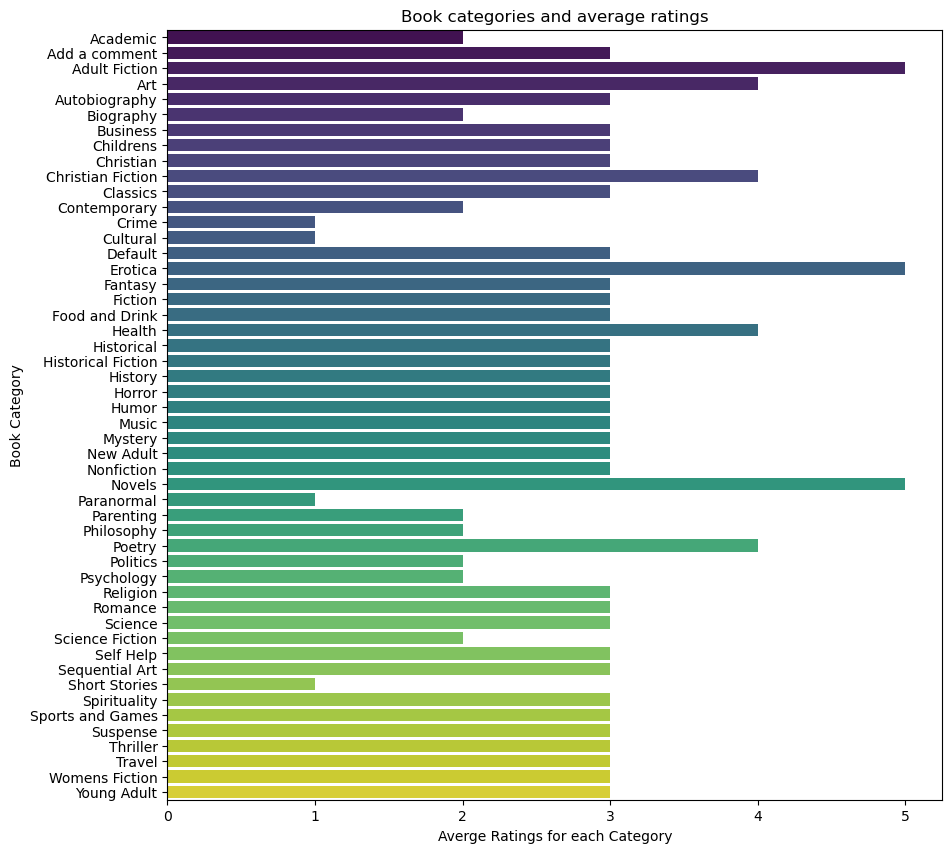

In [15]:
plt.figure(figsize=(10,10))
sns.barplot(y=data.index,x=data.values,palette='viridis')
plt.ylabel('Book Category')
plt.xlabel('Averge Ratings for each Category')
plt.title('Book categories and average ratings')
plt.show()

In [95]:
grouped_data_avg=df.groupby('genre')['price'].mean().reset_index()
df2=grouped_data_avg
df2.head()

,genre,price
0,Academic,13.120000
1,Add a comment,35.796418
2,Adult Fiction,15.360000
3,Art,38.520000
4,Autobiography,37.053333


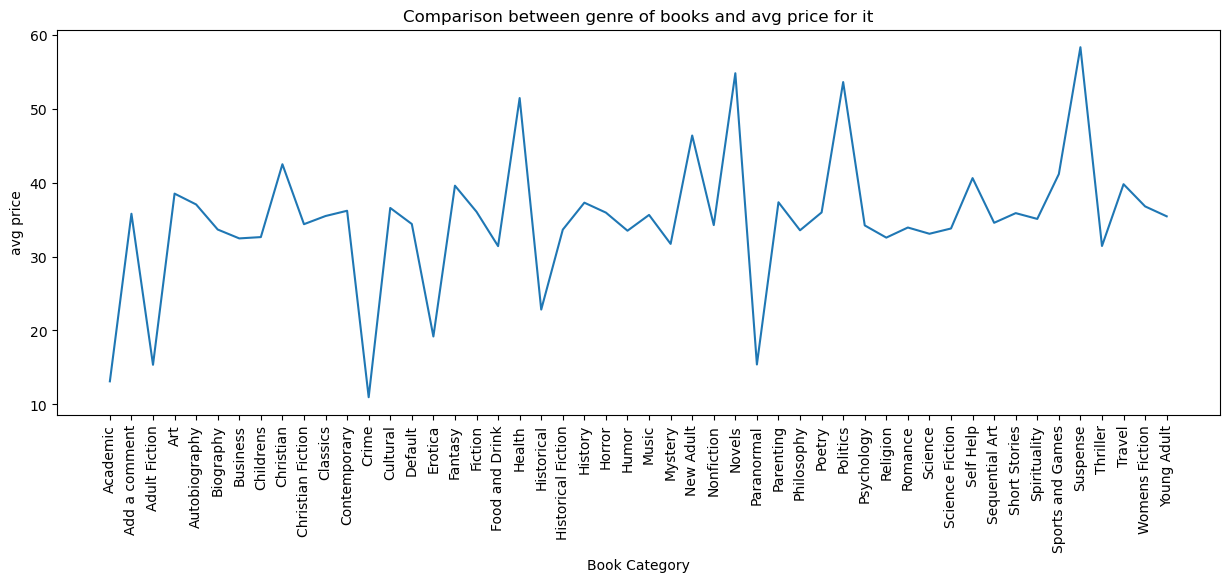

In [99]:
plt.figure(figsize=(15,5))
plt.plot(df2.genre,df2.price)
plt.xticks(rotation=90)
plt.xlabel('Book Category')
plt.ylabel('avg price')
plt.title('Comparison between genre of books and avg price for it')
plt.show()

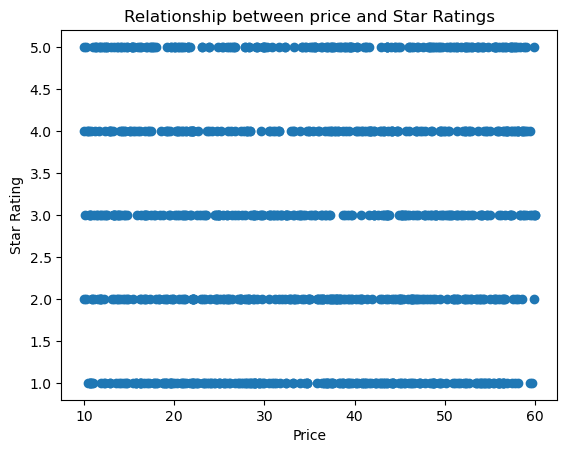

In [16]:
plt.scatter(df.price,df.stars)
plt.title('Relationship between price and Star Ratings')
plt.xlabel('Price')
plt.ylabel('Star Rating')
plt.show()

A plot showing no relationship between book price and ratings.

In [18]:
categories=df.genre.value_counts().reset_index()
categories=categories.sort_values(by='count', ascending=False).head(10)
categories

,genre,count
0,Default,151
1,Nonfiction,110
2,Sequential Art,75
3,Add a comment,67
4,Fiction,65
5,Young Adult,54
6,Fantasy,48
7,Romance,35
8,Mystery,32
9,Food and Drink,30


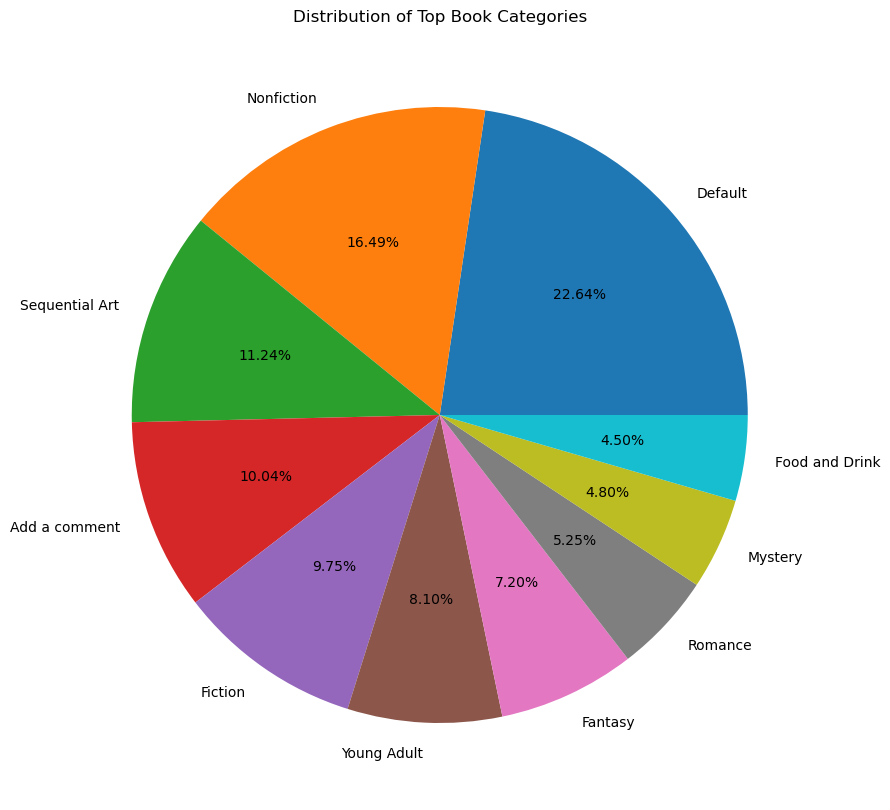

In [19]:
plt.figure(figsize=(10,10))
plt.pie(categories['count'],labels=categories['genre'],autopct='%0.2f%%')
plt.title('Distribution of Top Book Categories')
plt.show()

<Figure size 2000x1000 with 0 Axes>

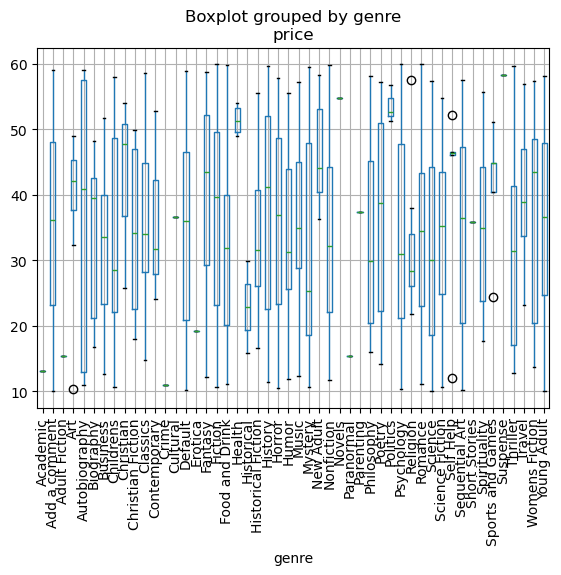

In [103]:
plt.figure(figsize=(20,10))
data=df[['genre','price']]
data.boxplot(by='genre',rot=90)
plt.xlabel('genre')
plt.show()

In [21]:
from wordcloud import WordCloud

In [22]:
#visualize word cloud for sequentil art descreption and see the most frequent words in this genre
art_description=df[df['genre']=='Sequential Art']
art_description.sample(6)

,title,price,availability,stars,url,description,upc,genre
79,"Rat Queens, Vol. 3: Demons (Rat Queens (Collec...",50.40,In stock,3,https://books.toscrape.com/catalogue/rat-queen...,"Having survived the end of the world, the Quee...",c82a3e358c773c73,Sequential Art
993,"Bleach, Vol. 1: Strawberry and the Soul Reaper...",34.65,In stock,5,https://books.toscrape.com/catalogue/bleach-vo...,"Hot-tempered 15-year-old Ichigo Kurosaki, the ...",099fae4a0705d63b,Sequential Art
261,Superman Vol. 1: Before Truth (Superman by Gen...,11.89,In stock,5,https://books.toscrape.com/catalogue/superman-...,"Superman is going through some changes. First,...",ac8e3949d284e9a9,Sequential Art
222,"We Are Robin, Vol. 1: The Vigilante Business (...",53.90,In stock,1,https://books.toscrape.com/catalogue/we-are-ro...,The teenagers of Gotham City have adopted the ...,92275cedf6d8ee15,Sequential Art
86,orange: The Complete Collection 1 (orange: The...,48.41,In stock,1,https://books.toscrape.com/catalogue/orange-th...,A Plea From the FutureOn the day that Naho beg...,11809b1d323b3057,Sequential Art
956,"Paper Girls, Vol. 1 (Paper Girls #1-5)",21.71,In stock,4,https://books.toscrape.com/catalogue/paper-gir...,"In the early hours after Halloween of 1988, fo...",bcbcbcf0f6ed196f,Sequential Art


In [23]:
art_description_text=' '.join(art_description['description'])
art_description_text

'Scott Pilgrim\'s life is totally sweet. He\'s 23 years old, he\'s in a rockband, he\'s "between jobs" and he\'s dating a cute high school girl. Nothing could possibly go wrong, unless a seriously mind-blowing, dangerously fashionable, rollerblading delivery girl named Ramona Flowers starts cruising through his dreams and sailing by him at parties. Will Scott\'s awesome life get Scott Pilgrim\'s life is totally sweet. He\'s 23 years old, he\'s in a rockband, he\'s "between jobs" and he\'s dating a cute high school girl. Nothing could possibly go wrong, unless a seriously mind-blowing, dangerously fashionable, rollerblading delivery girl named Ramona Flowers starts cruising through his dreams and sailing by him at parties. Will Scott\'s awesome life get turned upside-down? Will he have to face Ramona\'s seven evil ex-boyfriends in battle? The short answer is yes. The long answer is Scott Pilgrim, Volume 1: Scott Pilgrim\'s Precious Little Life ...more DUAL WORLDS, DUAL SIGHTS In the lan

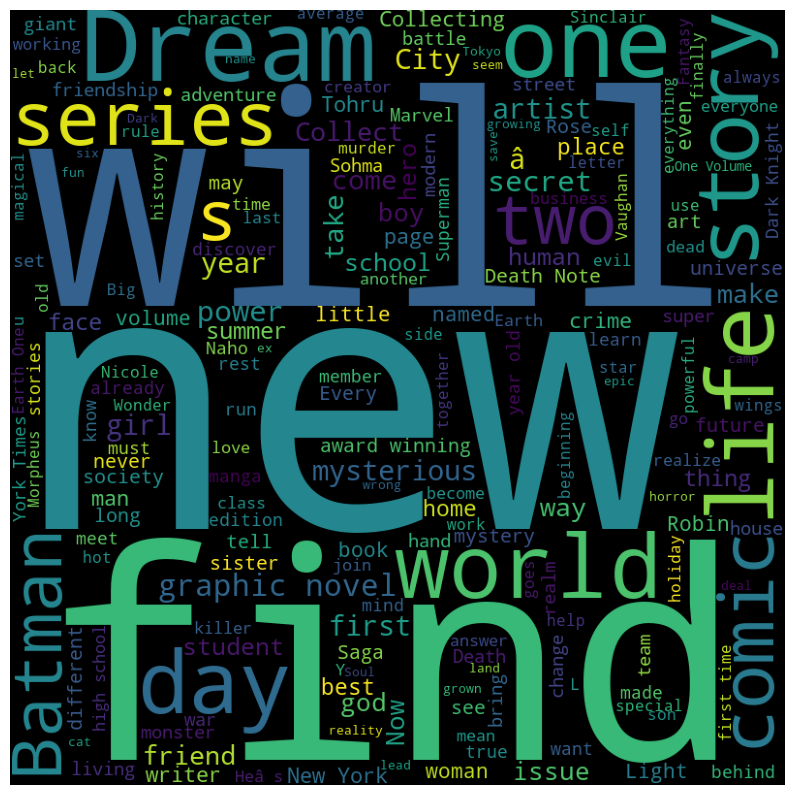

In [24]:
word=WordCloud(width=800,height=800).generate(art_description_text)
plt.figure(figsize=(10,15))
plt.imshow(word)
plt.axis('off')
plt.show()

### Saving data in mongoDB

In [26]:
#import lib which deal with mongoDB through python
from pymongo import MongoClient

In [27]:
#connect to mongoDB
client=MongoClient('mongodb://localhost:27017')
#create data base('My_Data_Base')
DB=client['My_Data_Base']
#create a collection in ('My_Data_Base') it's like table in SQL but here it saves data as a documents
Documents=DB['book_doc']

we need to convert DataFrame to list of dictionary each dict represents record or document to save it in mongoDB

In [29]:
list_of_dict=df.to_dict('records')
list_of_dict

[{'title': 'A Light in the Attic',
  'price': 51.77,
  'availability': 'In stock',
  'stars': 3,
  'url': 'https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
  'description': "It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? Rockab

In [30]:
#insert data in mongoDB
Documents.insert_many(list_of_dict)
#it autmatically assigns an id for each document

InsertManyResult([ObjectId('6806ace8d45f8b2c7b609dea'), ObjectId('6806ace8d45f8b2c7b609deb'), ObjectId('6806ace8d45f8b2c7b609dec'), ObjectId('6806ace8d45f8b2c7b609ded'), ObjectId('6806ace8d45f8b2c7b609dee'), ObjectId('6806ace8d45f8b2c7b609def'), ObjectId('6806ace8d45f8b2c7b609df0'), ObjectId('6806ace8d45f8b2c7b609df1'), ObjectId('6806ace8d45f8b2c7b609df2'), ObjectId('6806ace8d45f8b2c7b609df3'), ObjectId('6806ace8d45f8b2c7b609df4'), ObjectId('6806ace8d45f8b2c7b609df5'), ObjectId('6806ace8d45f8b2c7b609df6'), ObjectId('6806ace8d45f8b2c7b609df7'), ObjectId('6806ace8d45f8b2c7b609df8'), ObjectId('6806ace8d45f8b2c7b609df9'), ObjectId('6806ace8d45f8b2c7b609dfa'), ObjectId('6806ace8d45f8b2c7b609dfb'), ObjectId('6806ace8d45f8b2c7b609dfc'), ObjectId('6806ace8d45f8b2c7b609dfd'), ObjectId('6806ace8d45f8b2c7b609dfe'), ObjectId('6806ace8d45f8b2c7b609dff'), ObjectId('6806ace8d45f8b2c7b609e00'), ObjectId('6806ace8d45f8b2c7b609e01'), ObjectId('6806ace8d45f8b2c7b609e02'), ObjectId('6806ace8d45f8b2c7b609e

In [31]:
#for retrive data we use find funcion
retrevied_data=list(Documents.find())

In [32]:
retrevied_data=pd.DataFrame(retrevied_data)
retrevied_data.head()

,_id,title,price,availability,stars,url,description,upc,genre
0,68027b4ead852950191ccff0,A Light in the Attic,51.77,In stock,3,https://books.toscrape.com/catalogue/a-light-i...,It's hard to imagine a world without A Light i...,a897fe39b1053632,Poetry
1,68027b4ead852950191ccff1,Tipping the Velvet,53.74,In stock,1,https://books.toscrape.com/catalogue/tipping-t...,"""Erotic and absorbing...Written with starling ...",90fa61229261140a,Historical Fiction
2,68027b4ead852950191ccff2,Soumission,50.10,In stock,1,https://books.toscrape.com/catalogue/soumissio...,"Dans une France assez proche de la nÃ´tre, un ...",6957f44c3847a760,Fiction
3,68027b4ead852950191ccff3,Sharp Objects,47.82,In stock,4,https://books.toscrape.com/catalogue/sharp-obj...,"WICKED above her hipbone, GIRL across her hear...",e00eb4fd7b871a48,Mystery
4,68027b4ead852950191ccff4,Sapiens: A Brief History of Humankind,54.23,In stock,5,https://books.toscrape.com/catalogue/sapiens-a...,From a renowned historian comes a groundbreaki...,4165285e1663650f,History
